In [31]:
import numpy as np
from PIL import Image
from keras.models import load_model

# 모델 로드
model = load_model('mnist240924.keras')  # 학습된 모델 파일 경로

# 사용자 이미지 불러오기 및 전처리
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # 흑백 이미지로 변환
    img = img.resize((28, 28))  # 크기 조정

    # 흑백 반전
    img = 255 - np.array(img)  # 흑백 반전
    
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)  # 모델 입력 형태에 맞게 변형
    img = img / 255.0  # 정규화
    return img

# 예측
def predict_digit(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img) # 숫자별로 분류될 확률 생성
    print(prediction)
    digit = np.argmax(prediction) # 그 중 가장 높은 확률의 index 값이 예측 결과
    return digit

In [32]:
# 사용자 이미지 경로
image_path = '/home/kimpass189/code/mnist/note/train_img/0_1000.png'

# 예측 실행
predicted_digit = predict_digit(image_path)
print("예측된 숫자:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[0.10287333 0.09514736 0.09631243 0.09843154 0.09521464 0.09895499 0.10327607 0.09851981 0.10556097 0.10570883]]
예측된 숫자: 9


## 240925 mnist 구현

In [1]:
from keras.datasets import mnist
import os 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2024-09-25 15:23:24.122625: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-25 15:23:24.136723: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 15:23:24.286617: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 15:23:24.401009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 15:23:24.499886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [32]:
x_train_vec = train_images.reshape((60000,28,28,1)) # 차원 늘리기 3차원 -> 4차원 (개수, 높이, 너비, RGB)
x_test_vec = test_images.reshape((10000,28,28,1))

print(x_train_vec.shape)
print(x_test_vec.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [2]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import numpy as np
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

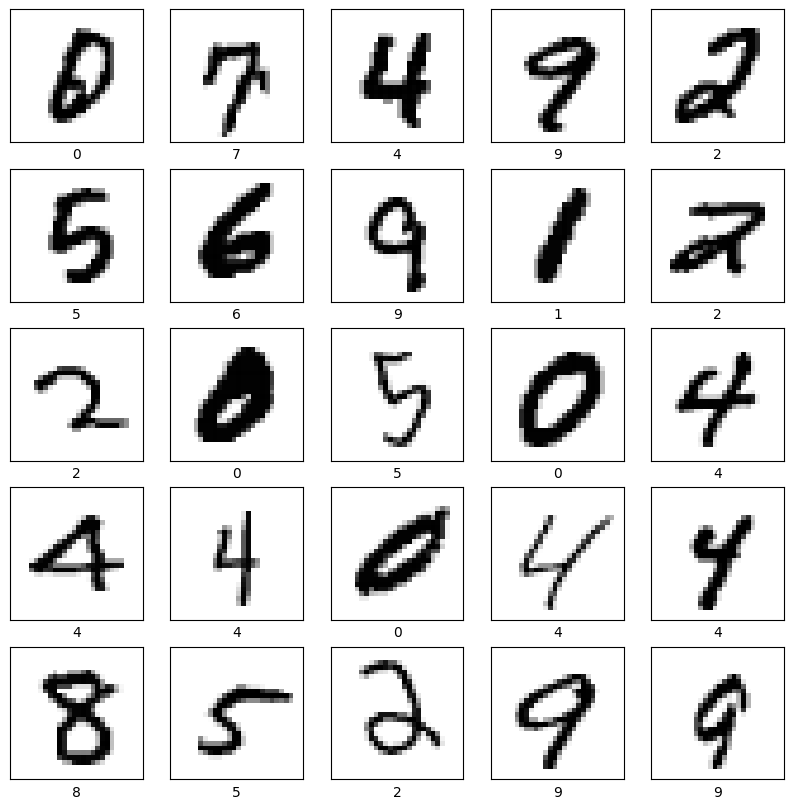

In [9]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10,10))
for i in range(25):
    ind = random.randint(0,60000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[ind], cmap=plt.cm.binary)
    plt.xlabel(train_labels[ind])
plt.show()

In [33]:
import numpy as np
# 라벨 원핫인코딩 ex) [0,0,0,1,0,0,0 ...]
def to_one_hot(labels, dimension = 10):
    results = np.zeros((len(labels), dimension)) # 영벡터 생성
    for i, label in enumerate(labels): # enumerate를 통해서 i번째 이미지, 정답라벨을 받아서 해당 위치를 1로 변환
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(train_labels)
y_test_vec = to_one_hot(test_labels)

In [22]:
print(y_train_vec.shape)
print(y_test_vec.shape)

(60000, 10)
(10000, 10)


In [26]:
import numpy as np
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [27]:
y_train_vec[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [38]:
# random하게 데이터 split기기
rand_indices = np.random.permutation(60000)
train_ind = rand_indices[0:50000]
val_ind = rand_indices[50000:60000]

x_val_vec = x_train_vec[val_ind,:,:,:]
y_val_vec = y_train_vec[val_ind,:]

x_train_vec = x_train_vec[train_ind,:,:,:]
y_train_vec = y_train_vec[train_ind,:]

In [40]:
print(x_train_vec.shape)
print(y_train_vec.shape)
print(x_val_vec.shape)
print(y_val_vec.shape)

(50000, 28, 28, 1)
(50000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [52]:
from keras import Sequential
from keras import layers

In [61]:
model = Sequential([
    layers.Conv2D(filters = 10, kernel_size = (5,5), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters = 20, kernel_size = (5,5), activation = 'relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [62]:
model.compile(optimizer="RMSprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [63]:
history = model.fit(x_train_vec, y_train_vec, epochs=5, batch_size=128,
                   validation_data=(x_val_vec, y_val_vec))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7601 - loss: 3.3933 - val_accuracy: 0.9651 - val_loss: 0.1149
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9722 - loss: 0.0972 - val_accuracy: 0.9762 - val_loss: 0.0716
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9817 - loss: 0.0604 - val_accuracy: 0.9803 - val_loss: 0.0696
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9867 - loss: 0.0444 - val_accuracy: 0.9827 - val_loss: 0.0615
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9903 - loss: 0.0347 - val_accuracy: 0.9804 - val_loss: 0.0678


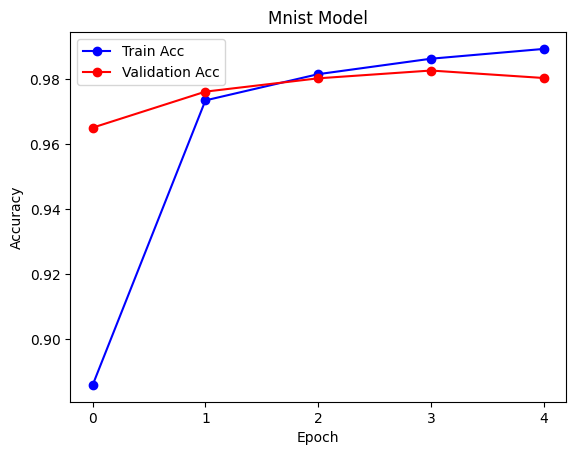

In [80]:
epoch = np.arange(len(history.history['accuracy']))
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, 'bo-', label = 'Train Acc')
plt.plot(epoch, val_acc, 'ro-', label = 'Validation Acc')
plt.xticks(epoch)
plt.title('Mnist Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
# model.save('mnist925.h5')
model.save('mnist925.keras')

## Train image Datasets 저장

In [22]:
# save_dir = "train_img"
# os.makedirs(save_dir, exist_ok = True)
# def save_images(images, labels):
#     for i, (imga, label) in enumerate(zip(images, labels)):
#         img = Image.fromarray(imga)
#         name = f'{label}_{i}.png'
#         img.save(os.path.join(save_dir, name))
# save_images(train_images, train_labels)